In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import hgcdte_py as hgcdte

In [3]:
def make_well(beg, width, xb, xw, delta = 1.e-5):
    zs = np.array([beg, beg + delta, beg + width - delta, beg + width])
    xs = np.array([xb,  xw,          xw,                xb])
    return (zs, xs)

In [4]:
mds = []
xw, xb = 0.0, 0.7
ips = [float(x) * 0.1 + 1.e-4 for x in range(0, 100)]
for i in ips:
    zs = [0., 10., 10.001, 10.002 + i, 10.003 + i, 20. + i]
    xs = [xb, xb,  xw,     xw,         xb,         xb]
    md = hgcdte.model(np.array(zs), np.array(xs))
    mds.append(md)

In [5]:
mds[0]

In [6]:
hcs = [hgcdte.hcore(m, 61) for m in mds]

In [7]:
sps = np.array([h.spectre((0., 0.)) for h in hcs])

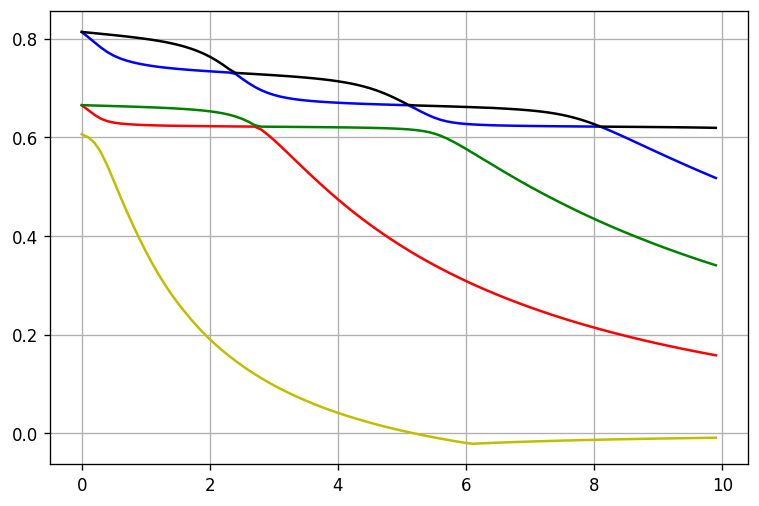

In [8]:
plt.figure(figsize=(7.5,5), dpi=120)
plt.plot(ips, sps[:, 366], 'y-')
plt.plot(ips, sps[:, 368], 'r-')
plt.plot(ips, sps[:, 370], 'g-')
plt.plot(ips, sps[:, 372], 'b-')
plt.plot(ips, sps[:, 374], 'k-')
plt.grid()